In [1]:
import pandas as pd

# Load CSVs
skater_stats = pd.read_csv('data/game_skater_stats.csv')
games = pd.read_csv('data/game.csv')
team_stats = pd.read_csv('data/game_teams_stats.csv')

# Merge game_skater_stats with game to get 'season'
df = skater_stats.merge(games[['game_id', 'season']], on='game_id', how='left')

# Merge with team_stats to get HoA
df = df.merge(team_stats[['game_id', 'team_id', 'HoA']], on=['game_id', 'team_id'], how='left')

# Add isHomeTeam column: 1 if HoA is 'Home', 0 otherwise
df['isHomeTeam'] = (df['HoA'] == 'home')#.astype(int)

# Select the columns of interest
final_df = df[['player_id', 'game_id', 'season', 'faceoffTaken', 'faceOffWins', 'isHomeTeam']]

# Display or save
print(final_df.head())
print(final_df['season'].unique())

   player_id     game_id    season  faceoffTaken  faceOffWins  isHomeTeam
0    8468513  2016020045  20162017             0            0       False
1    8476906  2016020045  20162017             0            0       False
2    8474668  2016020045  20162017             0            0       False
3    8473512  2016020045  20162017            27           11       False
4    8471762  2016020045  20162017             0            0       False
[20162017 20172018 20152016 20142015 20132014 20122013 20112012 20102011
 20092010 20082009 20072008 20062007 20022003 20032004 20052006 20002001
 20012002 20192020 20182019]


In [2]:
final_df = final_df[final_df['season'] >= 20082009]
#final_df = final_df[final_df['faceoffTaken'] > 0]
#final_df.to_csv('faceoffsByGame.csv', index=False)

In [3]:
final_df['player_id'].nunique()

2359

In [4]:
players_all_games = (
    final_df.groupby('player_id')
    .apply(lambda x: (x['faceoffTaken'] >= 1).all())
)
num_players = players_all_games.sum()

print(num_players)
players_all_games

151


C:\Users\ninja\AppData\Local\Temp\ipykernel_8408\3865638260.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['faceoffTaken'] >= 1).all())


player_id
8445550    False
8445735     True
8445739    False
8446053    False
8446485    False
           ...  
8481642    False
8481649    False
8481650    False
8481812    False
8481813     True
Length: 2359, dtype: bool

In [5]:
filtered_df = final_df[final_df['player_id'].isin(players_all_games[players_all_games].index)]
len(filtered_df)

47223

In [6]:
#filtered_df.to_csv('faceoffsByGame_filtered.csv', index=False)

In [8]:
df_overview = (
    filtered_df.groupby(['player_id', 'season'])
    .agg(seasonfaceoffTaken=('faceoffTaken', 'sum'),
         seasonfaceOffWins=('faceOffWins', 'sum'))
    .reset_index()
)
print(df_overview.head())

   player_id    season  seasonfaceoffTaken  seasonfaceOffWins
0    8445735  20082009                1488                908
1    8445735  20092010                 849                499
2    8447958  20082009                 506                300
3    8451359  20082009                 122                 71
4    8451774  20082009                 601                332


In [15]:

# Show each player_id and how many seasons they played in
df_player_seasons = df_overview.groupby('player_id')['season'].nunique().reset_index()
df_player_seasons.columns = ['player_id', 'num_seasons']
df_player_seasons

,player_id,num_seasons
0,8445735,2
1,8447958,1
2,8451359,1
3,8451774,1
4,8455919,3
...,...,...
146,8480185,1
147,8480384,1
148,8480954,1
149,8481516,1


In [23]:
import pandas as pd
df = pd.read_csv('data/game_teams_stats.csv')
df_seasons = pd.read_csv('data/game.csv')
df = df.merge(df_seasons[['season','game_id']], on='game_id', how='left')
df['team_id'].unique()

array([ 4, 16, 24,  7, 21, 52, 12, 20, 15,  8, 10, 26, 23, 29, 22,  5, 25,
        2, 53,  1, 14, 30, 28,  6, 18,  9, 13,  3, 17, 19, 54, 27, 11, 88,
       87, 90, 89])

In [24]:
df_team_overview = (
    df.groupby(['team_id', 'season'])
    .agg(seasonFOpercent=('faceOffWinPercentage', 'mean'))
    .reset_index()
)
df_team_overview = df_team_overview.dropna()

df_team_overview.to_csv('team_faceoff_overview.csv', index=False)

len(df_team_overview)


310

In [26]:
team_season_counts = df_team_overview.groupby('team_id')['season'].nunique().reset_index()
team_season_counts.columns = ['team_id', 'num_seasons']
print(team_season_counts)


    team_id  num_seasons
0         1           10
1         2           10
2         3           10
3         4           10
4         5           10
5         6           10
6         7           10
7         8           10
8         9           10
9        10           10
10       11            1
11       12           10
12       13           10
13       14           10
14       15           10
15       16           10
16       17           10
17       18           10
18       19           10
19       20           10
20       21           10
21       22           10
22       23           10
23       24           10
24       25           10
25       26           10
26       27            4
27       28           10
28       29           10
29       30           10
30       52            9
31       53            6
32       54            3
33       87            2
34       88            2
35       89            2
36       90            1


In [27]:
teams_to_drop = [11,27,52,53,54,87,88,89,90]
df_team_overview = df_team_overview[~df_team_overview['team_id'].isin(teams_to_drop)]
df_team_overview.to_csv('team_faceoff_overview.csv', index=False)
len(df_team_overview)

280

In [28]:
team_season_counts = df_team_overview.groupby('team_id')['season'].nunique().reset_index()
team_season_counts.columns = ['team_id', 'num_seasons']
print(team_season_counts)

    team_id  num_seasons
0         1           10
1         2           10
2         3           10
3         4           10
4         5           10
5         6           10
6         7           10
7         8           10
8         9           10
9        10           10
10       12           10
11       13           10
12       14           10
13       15           10
14       16           10
15       17           10
16       18           10
17       19           10
18       20           10
19       21           10
20       22           10
21       23           10
22       24           10
23       25           10
24       26           10
25       28           10
26       29           10
27       30           10


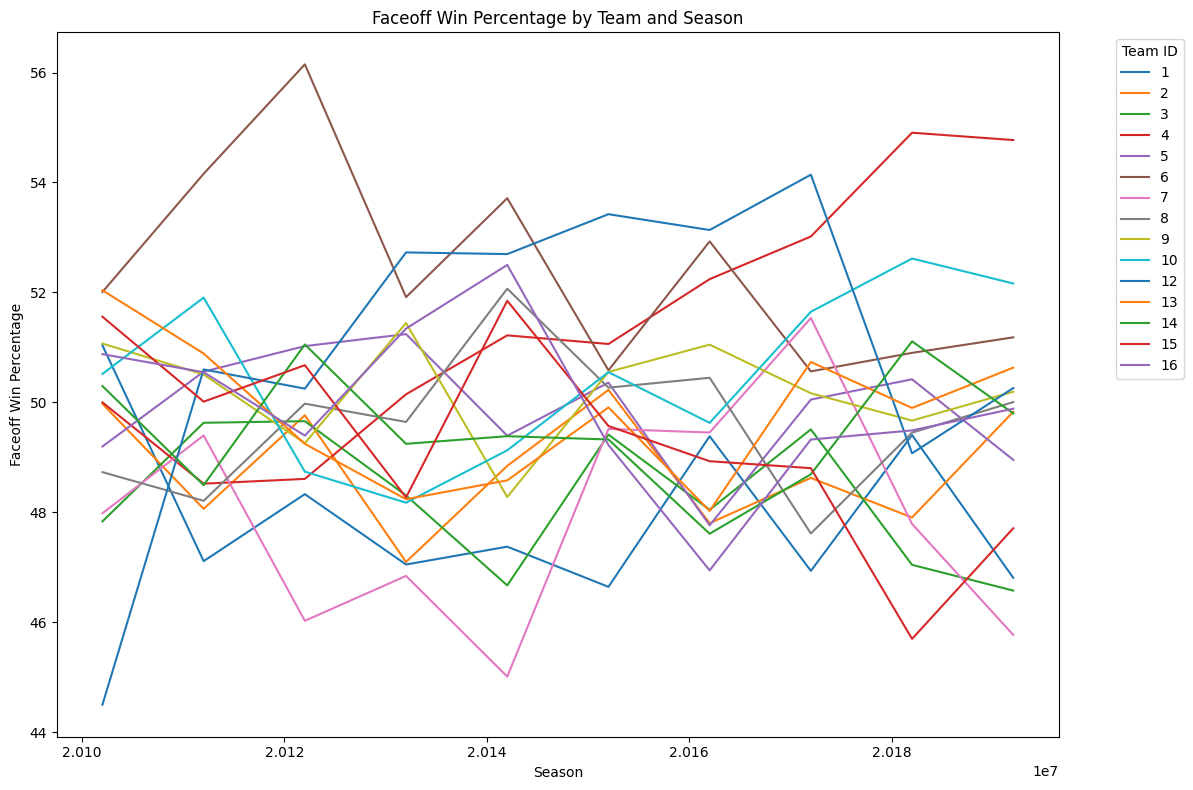

In [30]:
import matplotlib.pyplot as plt
# Line graph: each team_id, x=season, y=seasonFOpercent
plt.figure(figsize=(12, 8))
for i,team_id in enumerate(df_team_overview['team_id'].unique()):
    if i < 15:
        team_data = df_team_overview[df_team_overview['team_id'] == team_id]
        plt.plot(team_data['season'], team_data['seasonFOpercent'], label=str(team_id))
plt.xlabel('Season')
plt.ylabel('Faceoff Win Percentage')
plt.title('Faceoff Win Percentage by Team and Season')
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.show()


## Anotha One

In [5]:
import pandas as pd

# Load CSVs
skater_stats = pd.read_csv('data/game_skater_stats.csv')
games = pd.read_csv('data/game.csv')


# Merge game_skater_stats with game to get 'season'
df = skater_stats.merge(games[['game_id', 'season']], on='game_id', how='left')

player_season_summary = (
    df.groupby(['player_id', 'season'])
    .agg(faceoffTaken=('faceoffTaken', 'sum'),
         faceOffWins=('faceOffWins', 'sum'))
    .reset_index()
)
player_season_summary = player_season_summary[player_season_summary['season'] >= 20082009]
len(player_season_summary)


10648

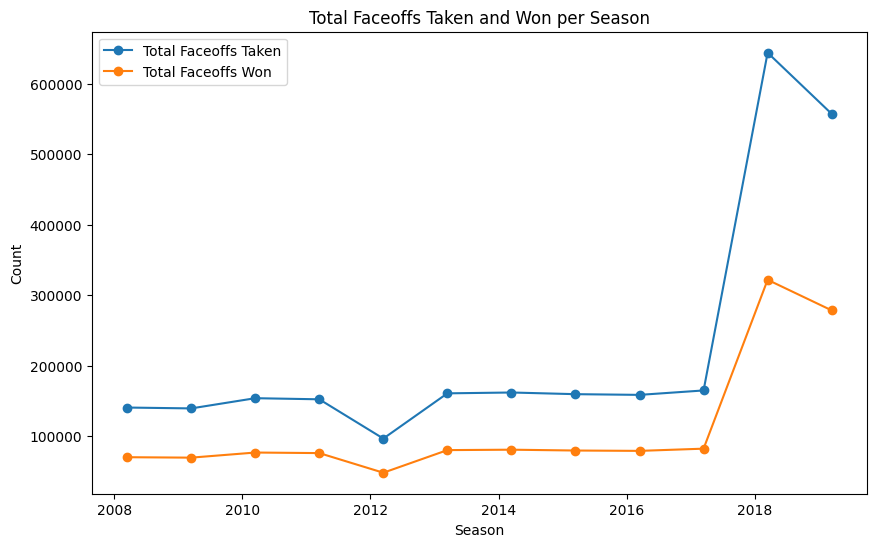

In [11]:
#graph the total number of faceoffs taken per season
import matplotlib.pyplot as plt
season_summary = (
    player_season_summary.groupby('season')
    .agg(total_faceoffs=('faceoffTaken', 'sum'),
         total_wins=('faceOffWins', 'sum'))
    .reset_index())
season_summary['season'] = season_summary['season']/10000
plt.figure(figsize=(10, 6))
plt.plot(season_summary['season'], season_summary['total_faceoffs'], marker='o', label='Total Faceoffs Taken')
plt.plot(season_summary['season'], season_summary['total_wins'], marker='o', label='Total Faceoffs Won')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Total Faceoffs Taken and Won per Season')
plt.legend()


In [14]:
player_season_summary = player_season_summary[player_season_summary['season'] >= 20122013]
player_season_summary = player_season_summary[player_season_summary['season'] <= 20162017]



1457

In [17]:

num_seasons = player_season_summary['season'].nunique()
players_all_seasons = player_season_summary.groupby('player_id').filter(lambda x: len(x) == num_seasons and (x['faceoffTaken'] > 100).all())
num_players_all_seasons = players_all_seasons['player_id'].nunique()
print(f"Number of players with at least 1 faceoff in every season: {num_players_all_seasons}")


Number of players with at least 1 faceoff in every season: 85


In [20]:
players_all_seasons.to_csv('this_time_for_real.csv', index=False)

## Even more!

In [ ]:
import pandas as pd

df = pd.read_csv('this_time_for_real.csv')